In [1]:
import pandas as pd
import datetime as dt
import numpy as np

import pylab as pl
import seaborn as sns
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
IN_PATH = '/Users/anokhin/Desktop/profi_ckat_matched'
SAMPLE_PATH = '/Users/anokhin/Desktop/profi_ckat_sample'
LOC_PATH = '/Users/anokhin/Desktop/mailru_km_orders_data_clean_NEW.xlsx'

In [3]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y%m%d")
df1 = pd.read_csv(
    IN_PATH, sep="\t", 
    header=None, names=['klient_id', 'mb', 'emails', 'okids', 'vkids', 'age', 'gender', 'retro_dt'],
    converters={'retro_dt': ts_parser},
    dtype={"okids": str, "vkids": str}
)

df1.head()

,klient_id,mb,emails,okids,vkids,age,gender,retro_dt
0,beau=1000487,0,NaN,NaN,219933780,0.500000,0,2015-05-18
1,beau=1000560,3,NaN,519958602210,190613242,0.660178,0,2015-10-20
2,beau=1000560,0,X2V+XsytIeOY1xOsN7CCvvFhfUbIPc55,NaN,NaN,0.660178,0,2015-10-20
3,beau=1000982,3,"rHMWdqV/aetBXSei8YqlI+TVEQ6hCvVL,2ELOi1eCH/CqZ...",58949664152,3272478,0.695453,0,2015-06-04
4,beau=1000982,0,"GLN3hTnOyKMszF1+n0AMxoFZ5jAGYw5E,+HIaTnxgt0oM+...",NaN,NaN,0.695453,0,2015-06-04


In [4]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y%m%d")
df_ckat = pd.read_csv(
    SAMPLE_PATH, sep="\t", 
    header=0, names=['klient_id', 'phone', 'birth_dt', 'klient_gender', 'retro_dt', 'ckat', 'email'],
    converters={'retro_dt': ts_parser},
    dtype={"okids": str, "vkids": str}
)

df_ckat.head()

,klient_id,phone,birth_dt,klient_gender,retro_dt,ckat,email
0,medi=1197904,9651956276,XNA,0,2015-01-01,3,XNA
1,medi=1742854,9104461011,XNA,0,2015-01-01,2,XNA
2,medi=1995689,9262705909,XNA,1,2015-01-01,4,XNA
3,medi=2004118,9253780732,XNA,0,2015-01-01,3,XNA
4,medi=2226403,9150914705,XNA,0,2015-01-01,2,XNA


In [5]:
df_loc = pd.ExcelFile(LOC_PATH).parse(0).set_index("klient_id")

def location(klient_id):
    mapping = {u"У мастера": 1, u"У клиента": 2, u"Не принципиально": 3}
    kid = klient_id.strip("beau=")
    if int(kid) not in df_loc.index:
        return None
    locs = np.unique(df_loc.loc[int(kid)]["location"])
    if len(locs) != 1 or pd.isnull(locs[0]):
        return None
    else:        
        return mapping[locs[0]]

In [6]:
df = pd.merge(df1, df_ckat, how='inner', on=['klient_id', 'retro_dt'])
df_m = df#[df.mb == 3]
df_m.head()

,klient_id,mb,emails,okids,vkids,age,gender,retro_dt,phone,birth_dt,klient_gender,ckat,email
0,beau=1000487,0,NaN,NaN,219933780,0.500000,0,2015-05-18,9165134515,XNA,0,1,XNA
1,beau=1000560,3,NaN,519958602210,190613242,0.660178,0,2015-10-20,9167389282,XNA,0,2,XNA
2,beau=1000560,0,X2V+XsytIeOY1xOsN7CCvvFhfUbIPc55,NaN,NaN,0.660178,0,2015-10-20,9167389282,XNA,0,2,XNA
3,beau=1000982,3,"rHMWdqV/aetBXSei8YqlI+TVEQ6hCvVL,2ELOi1eCH/CqZ...",58949664152,3272478,0.695453,0,2015-06-04,9037614667,XNA,0,1,XNA
4,beau=1000982,0,"GLN3hTnOyKMszF1+n0AMxoFZ5jAGYw5E,+HIaTnxgt0oM+...",NaN,NaN,0.695453,0,2015-06-04,9037614667,XNA,0,1,XNA


In [7]:
df_medi = df_m[df_m.klient_id.map(lambda i: i.startswith("medi="))].copy()
df_beau = df_m[df_m.klient_id.map(lambda i: i.startswith("beau="))].copy()
print "Found data MEDI=%s, BEAU=%s" % (df_medi.shape, df_beau.shape)

Found data MEDI=(56748, 13), BEAU=(46680, 13)


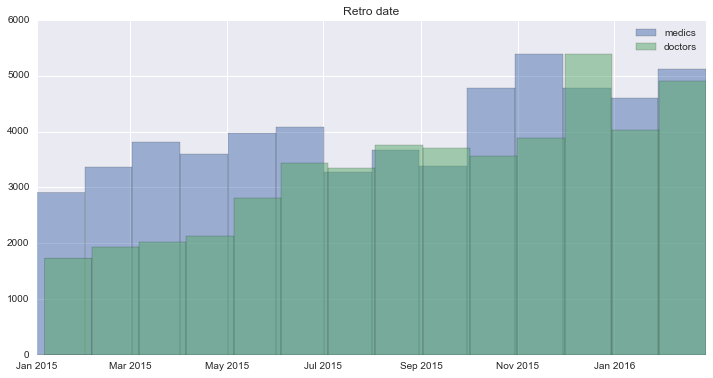

In [8]:
pl.figure(figsize=(12, 6))

df_medi.retro_dt.hist(bins=14, label="medics", alpha=0.5)
df_beau.retro_dt.hist(bins=14, label="doctors", alpha=0.5)
pl.title("Retro date")
pl.legend()

pl.show()

In [9]:
OUT_PATH_MEDIC = '/Users/anokhin/Desktop/profi_medic.jss'
OUT_PATH_BEAUTY = '/Users/anokhin/Desktop/profi_beauty.jss'

## Медики

In [10]:
df_medi[df_medi["retro_dt"] >= dt.date(2015, 9, 1)][["klient_id", "ckat"]].groupby('ckat').count()

,klient_id
ckat,
0,11318
1,1761
2,6102
3,7553
4,1145


In [11]:
df_medi["category"] = df_medi.ckat.map(lambda c: 1 if c == 0 else (2 if c == 1 or c == 2 else 3))
df_medi[df_medi["retro_dt"] >= dt.date(2015, 9, 1)][["klient_id", "category"]].groupby('category').count()

,klient_id
category,
1,11318
2,7863
3,8698


In [12]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":%s,"category":{"int":%s},"start":{"long":%d},"end":{"long":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [13]:
with open(OUT_PATH_MEDIC, "w") as out_file_medic:    
        for i, row in df_medi.iterrows():
            end_ts = int(row["retro_dt"].strftime("%s"))
            start_ts = end_ts - MONTH_SECONDS

            emails = row["emails"].split(",") if pd.notnull(row["emails"]) else [""]
            okids = row["okids"].split(",") if pd.notnull(row["okids"]) else [""]
            vkids = row["vkids"].split(",") if pd.notnull(row["vkids"]) else [""]           
            
            category = row["category"]

            for email in emails:
                for okid in okids:
                    for vkid in vkids:
                        em = STRING_PATTERN % email if email else "null"
                        ok = STRING_PATTERN % okid if okid else "null"
                        vk = STRING_PATTERN % vkid if vkid else "null"                       
                            
                        if category:
                            print >> out_file_medic, USER_PATTERN % ("", ok, em, vk, int(category), start_ts, end_ts)

In [14]:
%%bash
wc -l /Users/anokhin/Desktop/profi_medic.jss 
head /Users/anokhin/Desktop/profi_medic.jss

   86159 /Users/anokhin/Desktop/profi_medic.jss
{"vid":"","okid":{"string":"522413589455"},"email":null,"vkid":{"string":"156068915"},"category":{"int":1},"start":{"long":1423256400},"end":{"long":1425934800}}
{"vid":"","okid":{"string":"228275964505"},"email":{"string":"y0SQVhfhZyEin5JzKuGQKA=="},"vkid":null,"category":{"int":1},"start":{"long":1423256400},"end":{"long":1425934800}}
{"vid":"","okid":{"string":"228275964505"},"email":{"string":"L9ksK4NmRMVNyNMbmrGTgIFZ5jAGYw5E"},"vkid":null,"category":{"int":1},"start":{"long":1423256400},"end":{"long":1425934800}}
{"vid":"","okid":{"string":"125060320539"},"email":{"string":"ONSXhR6O/xRwR/51RnKmt+TVEQ6hCvVL"},"vkid":{"string":"62975440"},"category":{"int":1},"start":{"long":1442523600},"end":{"long":1445202000}}
{"vid":"","okid":{"string":"572477698068"},"email":null,"vkid":{"string":"52687177"},"category":{"int":2},"start":{"long":1427230800},"end":{"long":1429909200}}
{"vid":"","okid":{"string":"513910877517"},"email":{"string":"FnM

## Красота

In [15]:
df_beau["category"] = map(location, df_beau.klient_id)
df_beau.head()

/usr/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,klient_id,mb,emails,okids,vkids,age,gender,retro_dt,phone,birth_dt,klient_gender,ckat,email,category
0,beau=1000487,0,NaN,NaN,219933780,0.500000,0,2015-05-18,9165134515,XNA,0,1,XNA,NaN
1,beau=1000560,3,NaN,519958602210,190613242,0.660178,0,2015-10-20,9167389282,XNA,0,2,XNA,2
2,beau=1000560,0,X2V+XsytIeOY1xOsN7CCvvFhfUbIPc55,NaN,NaN,0.660178,0,2015-10-20,9167389282,XNA,0,2,XNA,2
3,beau=1000982,3,"rHMWdqV/aetBXSei8YqlI+TVEQ6hCvVL,2ELOi1eCH/CqZ...",58949664152,3272478,0.695453,0,2015-06-04,9037614667,XNA,0,1,XNA,2
4,beau=1000982,0,"GLN3hTnOyKMszF1+n0AMxoFZ5jAGYw5E,+HIaTnxgt0oM+...",NaN,NaN,0.695453,0,2015-06-04,9037614667,XNA,0,1,XNA,2


In [16]:
df_beau[df_beau["retro_dt"] >= dt.date(2015, 9, 1)][["klient_id", "category"]].groupby('category').count()

,klient_id
category,
1,12374
2,6487
3,3089


In [17]:
with open(OUT_PATH_BEAUTY, "w") as out_file_beauty:    
        for i, row in df_beau.iterrows():
            end_ts = int(row["retro_dt"].strftime("%s"))
            start_ts = end_ts - MONTH_SECONDS

            emails = row["emails"].split(",") if pd.notnull(row["emails"]) else [""]
            okids = row["okids"].split(",") if pd.notnull(row["okids"]) else [""]
            vkids = row["vkids"].split(",") if pd.notnull(row["vkids"]) else [""]           
            
            category = row["category"]
            if pd.isnull(category):
                continue

            for email in emails:
                for okid in okids:
                    for vkid in vkids:
                        em = STRING_PATTERN % email if email else "null"
                        ok = STRING_PATTERN % okid if okid else "null"
                        vk = STRING_PATTERN % vkid if vkid else "null"                       
                            
                        if category:
                            print >> out_file_beauty, USER_PATTERN % ("", ok, em, vk, int(category), start_ts, end_ts)

In [18]:
%%bash
wc -l /Users/anokhin/Desktop/profi_beauty.jss 
head /Users/anokhin/Desktop/profi_beauty.jss

   59871 /Users/anokhin/Desktop/profi_beauty.jss
{"vid":"","okid":{"string":"519958602210"},"email":null,"vkid":{"string":"190613242"},"category":{"int":2},"start":{"long":1442610000},"end":{"long":1445288400}}
{"vid":"","okid":null,"email":{"string":"X2V+XsytIeOY1xOsN7CCvvFhfUbIPc55"},"vkid":null,"category":{"int":2},"start":{"long":1442610000},"end":{"long":1445288400}}
{"vid":"","okid":{"string":"58949664152"},"email":{"string":"rHMWdqV/aetBXSei8YqlI+TVEQ6hCvVL"},"vkid":{"string":"3272478"},"category":{"int":2},"start":{"long":1430686800},"end":{"long":1433365200}}
{"vid":"","okid":{"string":"58949664152"},"email":{"string":"2ELOi1eCH/CqZvCXMTuf5g=="},"vkid":{"string":"3272478"},"category":{"int":2},"start":{"long":1430686800},"end":{"long":1433365200}}
{"vid":"","okid":null,"email":{"string":"GLN3hTnOyKMszF1+n0AMxoFZ5jAGYw5E"},"vkid":null,"category":{"int":2},"start":{"long":1430686800},"end":{"long":1433365200}}
{"vid":"","okid":null,"email":{"string":"+HIaTnxgt0oM+ndML7LnnOTVEQ6h